<a href="https://colab.research.google.com/github/dojun43/ML-Example/blob/master/Linear_Regression%2C_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

# 데이터 불러오기

In [ ]:
boston_data = datasets.load_boston()
data = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
target = pd.DataFrame(boston_data['target'], columns=['Target'])
df = pd.concat([data, target], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 상관계수 확인 
- -1~1 사이 값으로 절대값이 크면 상관관계가 있음

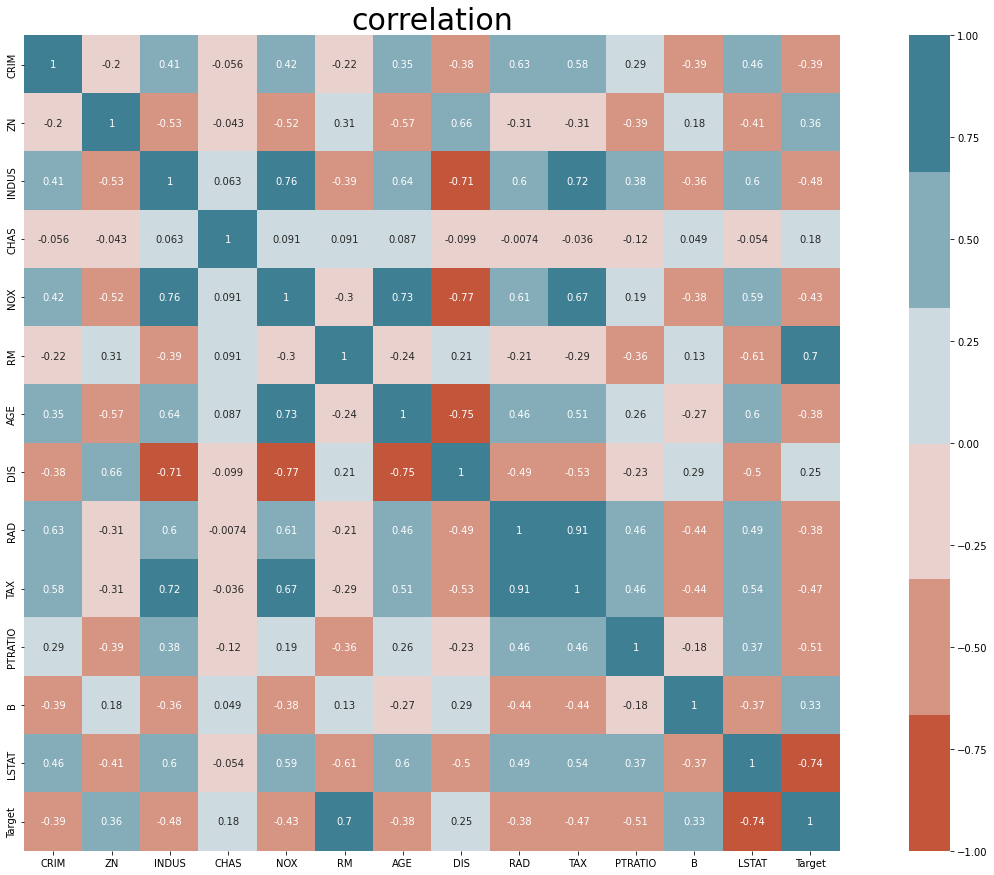

In [ ]:
number_df = df.select_dtypes(np.number)

corr = number_df.corr()
plt.figure(figsize=(25, 15)) # 가로, 세로 

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, # 상관계수의 범위
    cmap=sns.diverging_palette(20, 220), #색상 변화 범위
    square=True, 
    annot=True
)


plt.title('correlation', fontsize=30)
plt.show()

# 단순 회귀(Linear Regression)

## 1단계) 설명변수, 예측변수 데이터 생성 

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [ ]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df["Target"]

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Target, dtype: float64

## 2단계) train, test 데이터 생성

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)

In [ ]:
print('X_train shape:', np.shape(X_train), 'y_train shape:', np.shape(y_train))
print('X_test shape:', np.shape(X_test), 'y_test shape:', np.shape(y_test))

X_train shape: (404, 13) y_train shape: (404,)
X_test shape: (102, 13) y_test shape: (102,)


## 3단계) 모델 학습 및 예측

In [ ]:
import statsmodels.formula.api as sm  

In [ ]:
result = sm.ols(formula = 'target ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          6.42e-136
Time:                        14:31:29   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3639      5.091      7.143      0.000      26.361      46.366
CRIM          -0.1084      0.033     -3.304      0.001      -0.173      -0.044
ZN             0.0459      0.014      3.368      0.001       0.019       0.073
CHAS           2.7164      0.856      3.173      0.002       1.034       4.399
NOX          -17.4295      3.681     -4.735      0.000     -24.662     -10.197
RM             3.7970      0.416      9.132      0.000       2.980       4.614
AGE            0.0007      0.013      0.053      0.958      -0.025       0.027
DIS           -1.4896      0.195     -7.648      0.000      -1.872      -1.107
RAD            0.2999      0.064      4.710      0.000       0.175       0.425
TAX           -0.0118      0.003     -3.489      0.001      -0.018      -0.005
PTRATIO       -0.9471      0.130     -7.308      0.000      -1.202      -0.692
B              0.0093      0.003      3.461      0.001       0.004       0.015
LSTAT         -0.5235      0.051    -10.361      0.000      -0.623      -0.424
==============================================================================
Omnibus:                      178.124   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.481
Skew:                           1.521   Prob(JB):                    4.49e-171
Kurtosis:                       8.287   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred =model.predict(X_train)
true = y_train
train_MAE = mean_absolute_error(pred, true)

pred =model.predict(X_test)
true = y_test
test_MAE = mean_absolute_error(pred, true)

print('Train MAE :', train_MAE)
print('Test MAE :', test_MAE)

Train MAE : 3.2657183839640767
Test MAE : 3.24848208761642


# 다항회귀(Polynomial Regression)

## 1단계) 설명변수, 예측변수 데이터 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df["Target"]

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X = pd.DataFrame(poly.fit_transform(X))

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


## 2단계) train, test 데이터 생성

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)

In [ ]:
print('X_train shape:', np.shape(X_train), 'y_train shape:', np.shape(y_train))
print('X_test shape:', np.shape(X_test), 'y_test shape:', np.shape(y_test))

X_train shape: (404, 104) y_train shape: (404,)
X_test shape: (102, 104) y_test shape: (102,)


## 3단계) 모델 학습 및 예측

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred =model.predict(X_train)
true = y_train
train_MAE = mean_absolute_error(pred, true)

pred =model.predict(X_test)
true = y_test
test_MAE = mean_absolute_error(pred, true)

print('Train MAE :', train_MAE)
print('Test MAE :', test_MAE)

Train MAE : 1.6908702137038902
Test MAE : 2.6639003000549573
